In [1]:
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
# np.random.seed(2)

from keras.utils.np_utils import to_categorical

import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                    )


In [3]:
train_generator = train_datagen.flow_from_directory('data/train',
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 5000 images belonging to 8 classes.


In [4]:
model = keras.applications.VGG16(input_shape = (150,150,3), weights = 'imagenet',include_top=False)

for layer in model.layers:
    layer.trainable = False

last_layer = model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)

# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.2)(x)

# x = Dense(4096, activation='relu',name='fc-3')(x)
# x = Dropout(0.2)(x)

# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=model.input, outputs=out)

model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [5]:
model2.compile(optimizer='adam',metrics=['accuracy'],loss=tf.losses.CategoricalCrossentropy())

In [6]:
model2.fit_generator(train_generator,steps_per_epoch=18,epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
18/18 [==============================] - 17s 917ms/step - loss: 2.6284 - accuracy: 0.2413
Epoch 2/15
18/18 [==============================] - 17s 953ms/step - loss: 1.7865 - accuracy: 0.3628
Epoch 3/15
18/18 [==============================] - 16s 891ms/step - loss: 1.5209 - accuracy: 0.4583
Epoch 4/15
18/18 [==============================] - 15s 853ms/step - loss: 1.3508 - accuracy: 0.5254
Epoch 5/15
18/18 [==============================] - 17s 968ms/step - loss: 1.1951 - accuracy: 0.6042
Epoch 6/15
18/18 [==============================] - 16s 906ms/step - loss: 1.1089 - accuracy: 0.6042
Epoch 7/15
18/18 [==============================] - 16s 869ms/step - loss: 1.0159 - accuracy: 0.6493
Epoch 8/15
18/18 [==============================] - 16s 911ms/step - loss: 0.9255 - accuracy: 0.6493
Epoch 9/15
18/18 [==============================] - 16s 887ms/step - loss: 0.8201 - accuracy: 0.7083
Epoch 10/15
18/

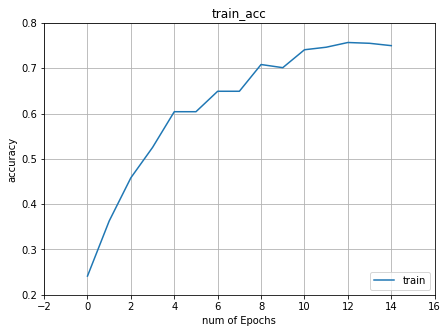

In [7]:

epochs = 15

# The uncomment everything in this cell and run it.
hist = model2.history

train_loss = hist.history['loss']
train_acc = hist.history['accuracy']
xc = range(epochs)


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [8]:
model = keras.applications.VGG19(input_shape = (150,150,3), weights = 'imagenet',include_top=False)

for layer in model.layers:
    layer.trainable = False

last_layer = model.output
# add a global spatial average pooling layer


x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# x = Dense(4096, activation='relu',name='fc-3')(x)
# x = Dropout(0.5)(x)

# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model3 = Model(inputs=model.input, outputs=out)

model3.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [10]:
model3.compile(optimizer='adam',metrics=['accuracy'],loss=tf.losses.CategoricalCrossentropy())

In [11]:
model3.fit_generator(train_generator,steps_per_epoch=18,epochs=15)

Epoch 1/15
18/18 [==============================] - 18s 1s/step - loss: 2.4944 - accuracy: 0.2591
Epoch 2/15
18/18 [==============================] - 20s 1s/step - loss: 1.8041 - accuracy: 0.3507
Epoch 3/15
18/18 [==============================] - 20s 1s/step - loss: 1.5611 - accuracy: 0.4288
Epoch 4/15
18/18 [==============================] - 22s 1s/step - loss: 1.4848 - accuracy: 0.4549
Epoch 5/15
18/18 [==============================] - 22s 1s/step - loss: 1.2948 - accuracy: 0.5503
Epoch 6/15
18/18 [==============================] - 20s 1s/step - loss: 1.3191 - accuracy: 0.5312
Epoch 7/15
18/18 [==============================] - 20s 1s/step - loss: 1.2080 - accuracy: 0.5833
Epoch 8/15
18/18 [==============================] - 20s 1s/step - loss: 1.3140 - accuracy: 0.5295
Epoch 9/15
18/18 [==============================] - 21s 1s/step - loss: 1.1927 - accuracy: 0.5868
Epoch 10/15
18/18 [==============================] - 19s 1s/step - loss: 1.1264 - accuracy: 0.6069
Epoch 11/15
18/18 [

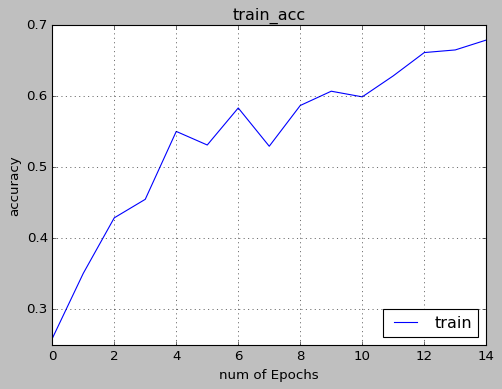

In [12]:

epochs = 15

# The uncomment everything in this cell and run it.
hist = model3.history

train_loss = hist.history['loss']
train_acc = hist.history['accuracy']
xc = range(epochs)


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [13]:
model = keras.applications.Xception(input_shape = (224,224,3), weights = 'imagenet',include_top=False)
model.summary()

for layer in model.layers:
	layer.trainable = False

last_layer = model.output
# add a global spatial average pooling layer


x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers

x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
# x = Dense(4096, activation='relu',name='fc-2')(x)
# x = Dropout(0.2)(x)


# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model4 = Model(inputs=model.input, outputs=out)

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [14]:
model4.compile(optimizer='adam',metrics=['accuracy'],loss=tf.losses.CategoricalCrossentropy())

In [15]:
model4.fit_generator(train_generator,steps_per_epoch=18,epochs=15)

Epoch 1/15
18/18 [==============================] - 9s 489ms/step - loss: 2.9905 - accuracy: 0.3559
Epoch 2/15
18/18 [==============================] - 9s 493ms/step - loss: 1.2808 - accuracy: 0.5694
Epoch 3/15
18/18 [==============================] - 9s 509ms/step - loss: 1.0758 - accuracy: 0.6389
Epoch 4/15
18/18 [==============================] - 9s 509ms/step - loss: 0.9725 - accuracy: 0.6441
Epoch 5/15
18/18 [==============================] - 9s 507ms/step - loss: 0.7974 - accuracy: 0.7448
Epoch 6/15
18/18 [==============================] - 9s 518ms/step - loss: 0.7840 - accuracy: 0.7205
Epoch 7/15
18/18 [==============================] - 9s 504ms/step - loss: 0.7514 - accuracy: 0.7552
Epoch 8/15
18/18 [==============================] - 9s 507ms/step - loss: 0.7060 - accuracy: 0.7552
Epoch 9/15
18/18 [==============================] - 9s 507ms/step - loss: 0.6064 - accuracy: 0.7880
Epoch 10/15
18/18 [==============================] - 9s 516ms/step - loss: 0.6383 - accuracy: 0.7812

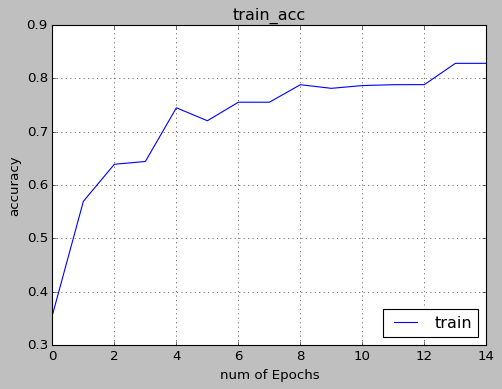

In [16]:

epochs = 15

# The uncomment everything in this cell and run it.
hist = model4.history

train_loss = hist.history['loss']
train_acc = hist.history['accuracy']
xc = range(epochs)


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [17]:
model4.save_weights('xception_weights.h5')

In [18]:
model_json = model4.to_json()
with open('xception_layout.json','w') as file:
    file.write(model_json)

In [19]:
model2.save_weights('vgg16_weights.h5')

In [20]:
model_json = model2.to_json()
with open('vgg16_layout.json','w') as file:
    file.write(model_json)

In [21]:
model3.save_weights('vgg19_weights.h5')

In [22]:
model_json = model3.to_json()
with open('vgg19_layout.json','w') as file:
    file.write(model_json)